# HW3 Problem 1


Implement the function get_random_data(w, b, mu, sigma, m) that generates random data for logisitic regression with two features features x_1 and x_2. This function should return the array data of shape (m, 2) and the array labels of shape (m, 1).

## Import Libraries

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Define Functions


### Get Random Data

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.zeros((m,2))
  labels = np.zeros(m)
  x_1 = np.random.default_rng().uniform(0,1,m)
  for i in range(m):
    n = np.random.default_rng().normal(mu, sigma, 1)
    c = np.random.randint(0,2)
    x_2 = w * x_1[i] + b + n*pow(-1, c)
    data[i][0] = x_1[i]
    data[i][1] = x_2
    labels[i] = c
  return data, labels



### Display Random Data

In [0]:
def display_random_data(data, labels):
  for i in range(len(labels)):
    if(labels[i] == 0):
      plt.plot(data[i][0],data[i][1], "b.")
    if(labels[i] == 1):
      plt.plot(data[i][0],data[i][1], "r.")

  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$X_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -8, 8])
  plt.show()


## Call Functions

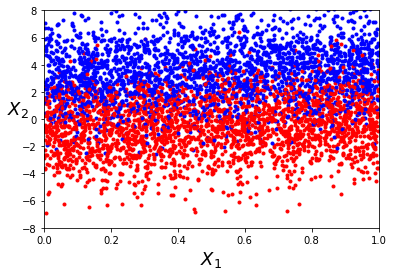

In [569]:
w = 1
b = 1
mu = 2
sigma = 2
m = 5000
data, labels = get_random_data(w, b, mu, sigma, m)
display_random_data(data, labels)

## Split into Training/Testing

In [570]:
split = (int)(0.8 * m)

training_data = data[0:split]
training_labels = labels[0:split]

testing_data = data[split:m]
testing_labels = labels[split:m]

print(training_data.shape)
print(training_labels.shape)
print(testing_data.shape)
print(testing_labels.shape)
training_data[0]

(4000, 2)
(4000,)
(1000, 2)
(1000,)


array([ 0.79654394, -0.4352589 ])

In [571]:
print(training_data)

[[ 0.79654394 -0.4352589 ]
 [ 0.81603497  5.73564157]
 [ 0.00732479 -0.50247214]
 ...
 [ 0.23514813 -1.17256738]
 [ 0.65215565 -1.64209708]
 [ 0.17535081  4.22997581]]


# HW3 Problem 2

## Import Keras

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

In [573]:
keras.__version__

'2.2.4-tf'

In [574]:
tf.__version__

'2.1.0'

## Create Keras

In [575]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(2,)))
#model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

num_epochs = 200

history = model.fit(training_data,
                    training_labels,
                    epochs = num_epochs,
                    batch_size = 512,
                    validation_data=(testing_data, testing_labels))    


Train on 4000 samples, validate on 1000 samples
Epoch 1/200
4000/4000 [==============================] - 0s 90us/sample - loss: 0.4510 - accuracy: 0.8180 - val_loss: 0.4672 - val_accuracy: 0.7940
Epoch 2/200
4000/4000 [==============================] - 0s 6us/sample - loss: 0.4469 - accuracy: 0.8198 - val_loss: 0.4642 - val_accuracy: 0.7950
Epoch 3/200
4000/4000 [==============================] - 0s 8us/sample - loss: 0.4437 - accuracy: 0.8210 - val_loss: 0.4616 - val_accuracy: 0.7950
Epoch 4/200
4000/4000 [==============================] - 0s 6us/sample - loss: 0.4409 - accuracy: 0.8223 - val_loss: 0.4592 - val_accuracy: 0.7950
Epoch 5/200
4000/4000 [==============================] - 0s 6us/sample - loss: 0.4382 - accuracy: 0.8227 - val_loss: 0.4569 - val_accuracy: 0.7970
Epoch 6/200
4000/4000 [==============================] - 0s 6us/sample - loss: 0.4357 - accuracy: 0.8227 - val_loss: 0.4546 - val_accuracy: 0.7980
Epoch 7/200
4000/4000 [==============================] - 0s 6us/sampl

## Plot Results

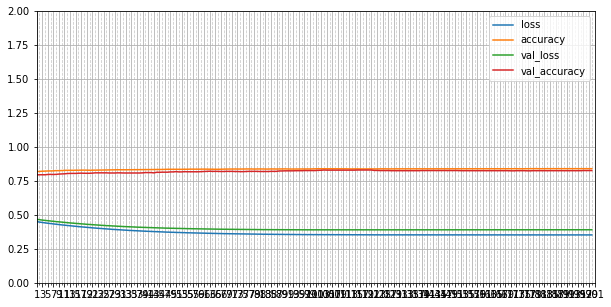

In [576]:
import pandas as pd
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)

plt.gca().set_ylim(0, 2) 
plt.gca().set_xlim(0, num_epochs)

plt.gca().xaxis.set_major_locator(MultipleLocator(2))

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : int(x + 1)))

plt.gca().xaxis.set_minor_locator(AutoMinorLocator(2))
plt.gca().grid(which='minor', color='#CCCCCC', linestyle='--')

plt.show()

## How well does the model separate the dots?

In [0]:

def plot_data_and_weights(data, labels, weights, w, b):
  for i in range(len(labels)):
    if(labels[i] == 0):
      plt.plot(data[i][0],data[i][1], "b.")
    if(labels[i] == 1):
      plt.plot(data[i][0],data[i][1], "r.")
 
  x = np.linspace(0, 1, 1000)
  y = w*x+b

  w1 = np.sum(weights[0][0])
  w2 = np.sum(weights[0][1])
  bias = (weights[1][0])

  xint = -((bias)/w1)
  yint = -((bias)/w2)
  m = yint / xint
  print(w1, w2, xint, yint, m, bias)
  yhat = -m * x + yint
  plt.plot(x,yhat, color = "black")

  plt.plot(x,y, color = "green")
  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$X_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -8, 8])
  plt.show()

The green line represents the line $y = w*x +b$, the line separating the feature vectors in the randomly generated data, where $b$ and $w$ were parameters used to generate the data.

The black line represents the decision boundary used by the model, created by the equation $y=m*x+b$. This was obtained by adjusting the original model equation of $z=w_1x_1+w_2x_2+b$ into slope-intercept form, where $w1$ is the weight of feature $x_1$, $w_2$ is the weight of feature $x_2$, and $b$ is the bias term.

Conversion process:

1.) Find x-intercept

  $\quad x_1 = -(b - w_2x_2) / w_1$

  $\quad$ if $x_2$ == 0

  $\quad x_1 = -(b - w_2 * 0) / w_1x_1 = -b / w_1$


2.) Find y-intercept

  $\quad x_2 = -(b - w_1x_1) / w_2$

  $\quad$ if $x_1$ == 0

  $\quad x_2 = -(b - w_1 * 0) / w_2x_2 = -b / w_2$


3.) Find Slope

  $\quad m=$ y-intercept $/$ x-intercept

  $\quad m= (-b / w_2) / (-b / w_1)$


4.) Convert to Slope-Intercept Form

  $\quad y=m*x + (-b / w_2)$

In [578]:
weights = model.layers[0].get_weights()
print(weights[1][0])

0.9447454


1.1907732 -1.0111555 -0.7933882 0.9343226 -1.1776361 0.9447454


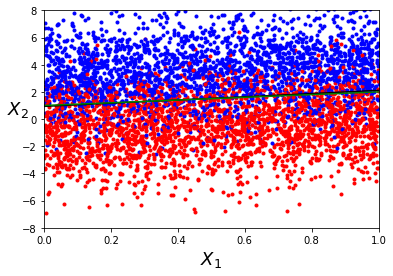

In [579]:

plot_data_and_weights(data, labels, weights, w, b)

## Heatmap

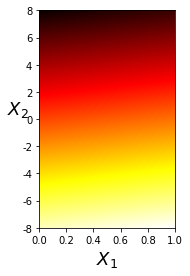

In [580]:
import matplotlib.ticker as ticker
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(-8, 8, 1600)

a = np.zeros((1600,1000))

for i in range(1600):
  for j in range(1000):
    a[i][j] = np.sum(weights[0][0]) * x1[j] + np.sum(weights[0][1])*x2[i] + weights[1][0]

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([0,1000])
plt.ylim([0,1600])

locs, graph_labels = plt.yticks()
graph_labels = [-8,-6,-4,-2,0,2,4,6,8]
plt.yticks(locs, graph_labels)

locs, graph_labels = plt.xticks()
graph_labels = [float(item)*0.001 for item in locs]
plt.xticks(locs, graph_labels)

plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", rotation=0, fontsize=18)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()

# HW3 Problem 3

## Logistic Regression with numpy

In [581]:
# number of epochs
epochs = 60
# learning rate
lr = 0.001

w_logreg = np.random.randn(2)
b_logreg = np.zeros(1)

print(w)
print(b)

1
1


In [0]:

def sigmoid(z):
  ret = np.exp(-z)
  return 1 / (1+ret) 

In [0]:
for epoch in np.arange(epochs):
  for i in np.arange(split):
    y_pred = np.dot(w_logreg,training_data[i]) + b_logreg

    #find partial derivative of bce in terms of w
    grad_w1 = (sigmoid(y_pred)-training_labels[i])*training_data[i][0]
    grad_w2 = (sigmoid(y_pred)-training_labels[i])*training_data[i][1]
    #find partial derivative of bce in terms of b
    grad_b = sigmoid(y_pred)-training_labels[i]

    w_logreg[0] -= lr * grad_w1
    w_logreg[1] -= lr * grad_w2
    b_logreg -= lr * grad_b

In [584]:
print(w_logreg[0])
print(w_logreg[1])
print(b_logreg)

0.9940115938359873
-1.0167753527062549
[1.06317196]


## Calculate loss and accuracy

In [0]:
def binary_cross_entropy(y,a):
  return -y * np.log10([a]) - (1-y)*np.log10([1-a])

In [0]:
loss = 0
for i in np.arange(split):
  y_pred = np.dot(w_logreg,training_data[i]) + b_logreg
  loss += binary_cross_entropy(training_labels[i],sigmoid(y_pred))
loss /= split

In [587]:
print(loss)

[[0.15292823]]


In [0]:
test_loss = 0
for i in np.arange(m-split):
  y_pred = np.dot(w_logreg,testing_data[i]) + b_logreg
  test_loss += binary_cross_entropy(testing_labels[i],sigmoid(y_pred))
test_loss /= split

In [589]:
print(test_loss)

[[0.04237168]]


In [0]:
accuracy = 0
for i in np.arange(split):
  y_pred = np.dot(w_logreg,training_data[i]) + b_logreg
  predict = sigmoid(y_pred)
  if (predict < 0.5):
    answer = 0
  if (predict >= 0.5):
    answer = 1
  if (answer == training_labels[i]):
    accuracy += 1
accuracy /= (split)

In [591]:
print(accuracy)

0.839


In [0]:
test_accuracy = 0
for i in np.arange(m-split):
  y_pred = np.dot(w_logreg,testing_data[i]) + b_logreg
  predict = sigmoid(y_pred)
  if (predict < 0.5):
    answer = 0
  if (predict >= 0.5):
    answer = 1
  if (answer == testing_labels[i]):
    test_accuracy += 1
test_accuracy /= (m-split)

In [593]:
print(test_accuracy)

0.825


## Plot Results

In [0]:
def plot_boundary(data, labels, w_old, b_old, w, b):
  for i in range(len(labels)):
    if(labels[i] == 0):
      plt.plot(data[i][0],data[i][1], "b.")
    if(labels[i] == 1):
      plt.plot(data[i][0],data[i][1], "r.")
 
  x = np.linspace(0, 1, 1000)
  w1 = w[0]
  w2 = w[1]

  xint = -((b)/w1)
  yint = -((b)/w2)
  m = yint / xint
  yhat = -m * x + yint
  y = w_old * x + b_old

  plt.plot(x,yhat, color = "black")
  plt.plot(x,y, color = "green")

  plt.xlabel("$X_1$", fontsize=18)
  plt.ylabel("$X_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -8, 8])
  plt.show()

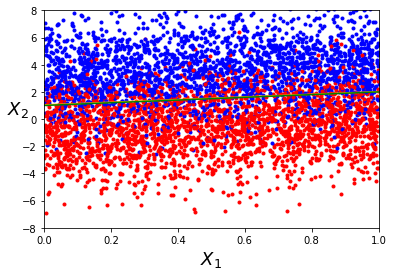

In [595]:
plot_boundary(data, labels, w, b, w_logreg, b_logreg)

## Heatmap

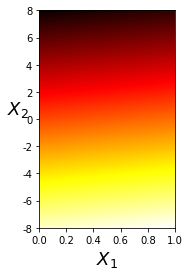

In [596]:
x1 = np.linspace(0, 1, 1000)
x2 = np.linspace(-8, 8, 1600)

a = np.zeros((1600,1000))

for i in range(1600):
  for j in range(1000):
    a[i][j] = w_logreg[0] * x1[j] + w_logreg[1]*x2[i] + b_logreg

fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([0,1000])
plt.ylim([0,1600])

locs, graph_labels = plt.yticks()
graph_labels = [-8,-6,-4,-2,0,2,4,6,8]
plt.yticks(locs, graph_labels)

locs, graph_labels = plt.xticks()
graph_labels = [float(item)*0.001 for item in locs]
plt.xticks(locs, graph_labels)

plt.xlabel("$X_1$", fontsize=18)
plt.ylabel("$X_2$", rotation=0, fontsize=18)
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()